## Introduction

Similar to Ponge at al 2021 [1], our algorithm is configurable to improve the efficiency of population synthesis. In Ponge et al 2021, the authors propose to set to 0 certain values in contingency tables which are used in Iterative Proportional Fitting algorithm.

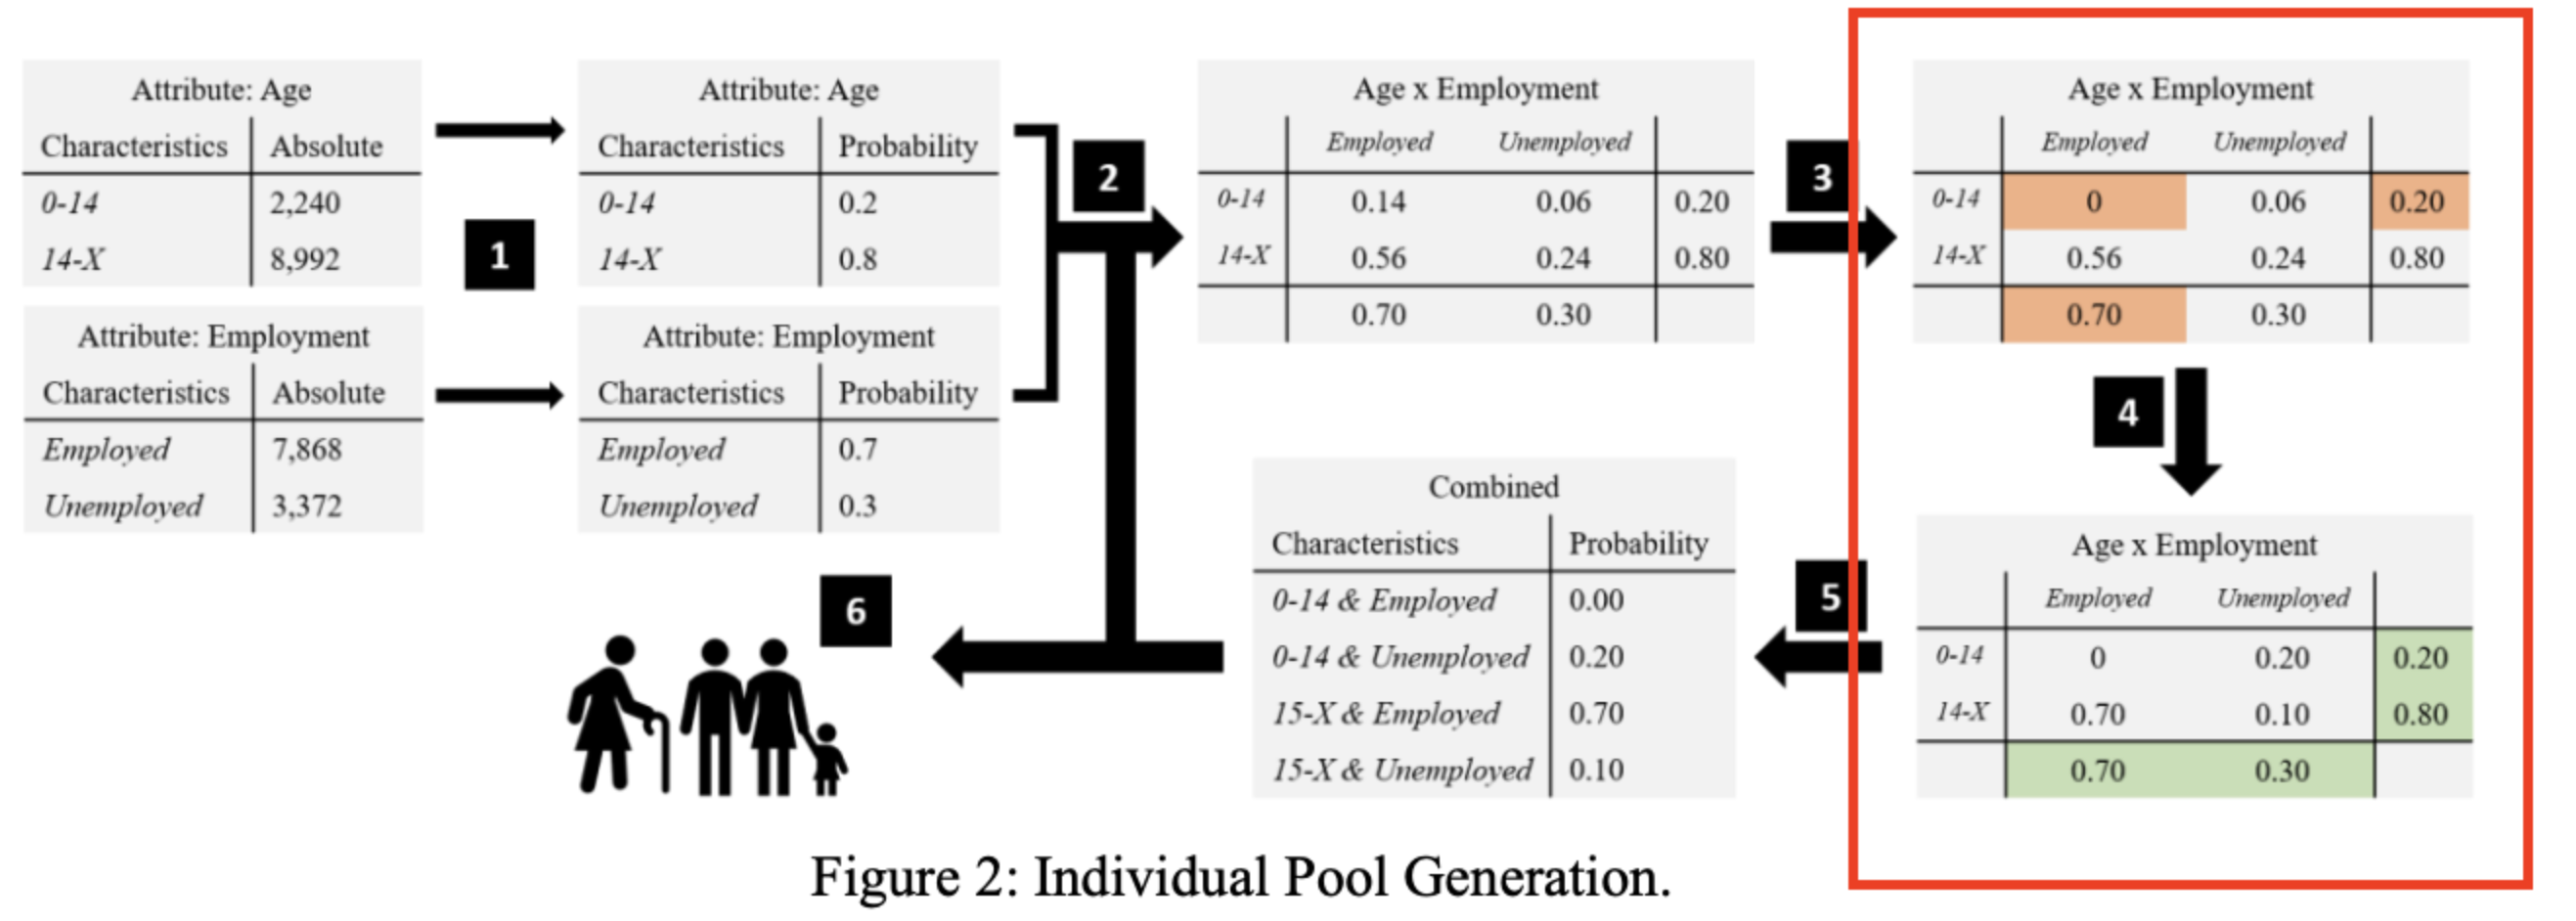

In our algorithm there is a config JSON file which is described below.

### Config JSON file

The JSON is a dictionary with 2 obligatory keys `missing_config` and `forced_config`:

```
{
    "missing_config": "SOME VALUE",
    "forced_config": "SOME VALUE"
}
```

The config file works only if both keys are provided.

### Key `forced_config`

Key `forced_config` works in a similar way as setting seed cells to 0 in Ponge at al 2021 [1]. It allows to enforce certain attribute combinations. It can be configured two-fold:

**Option 1 - missing**

```
{
    "missing_config": "SOME VALUE",
    "forced_config": "missing"
}
```

If value is `missing`, then the configuration is disabled (i.e. we do not enforce any rules for the algorithm).

**Option 2 - configuration is added**

```
{
    "missing_config": "SOME VALUE",
    "forced_config": 
    [
        {
            "if": 
            {
                "attribute1": [attribute_values...]
            }
            "then":
            {
                "attribute2": [attribute_values...]
            }
        }
    ]
}
```

Value for `"forced_config"` should be an array of dictionaries. Each dictionary has keys: `"if"` and `"then"`. Values of these dictionaries are always dictionaries with an attribute name and an array of attribute values. The attribute names and values should match the names and values from the data frames that are input data for population generation.

**How it works?**
With this config we force some attribute combinations to be implemented: **if** `attribute1` has certain values, **then** `attribute2` can only have values from certain array.

### Key `missing_config`

Key `missing_config` helps to tackle a problem of missing distributions for one attribute for given certain values of another attribute.  
For example if we have a contingency table `age_sex` for the individuals aged 0-100, but the table `income` includes income distribution for people aged 15-64, we should set the income to *missing* for people aged 0-15 and 64-100.  
This config can work 2-fold:

**Option 1 - missing**

```
{
    "missing_config": "missing",
    "forced_config": "SOME VALUE"
}
```

If value is `missing`, then the configuration is disabled (i.e. we do not enforce any missing values).

**Option 2 - configuration is added**

```
{
    "forced_config": "SOME VALUE",
    "missing_config": 
    [
        {
            "if": 
            {
                "attribute1": [attribute_values...]
            }
            "then":
            {
                "attribute2": "missing"
            }
        }
    ]
}
```

Value for `"missing_config"` should be a list of dictionaries. Each dictionary has keys: `"if"` and `"then"`. Values of `"if"` dictionaries are always dictionaries with an attribute name and attribute values. Value of `"then"` dictionary is always `"missing"`.
Value for `"missing_config"` should be an array of dictionaries. Each dictionary has keys: `"if"` and `"then"`. Values of `"if"` dictionary are always dictionaries with an attribute name and an array of attribute values. Value of `"then"` dictionary is always `"missing"`.

**How it works?**
With this config we set some attribute combinations to missing: **if** `attribute1` has certain values, **then** `attribute2` is missing.

### Example 1

1a. All people aged 5,10,15,20 will have marital status `not_married`.

1b. All females will have attribute `appearance` set to `"Beautiful"` or `"Very Beautiful"`.  

2a. If the person is 80, 90 or 100 years old, their work industry will be `missing`.

```
{
    "forced_config": : 
    [
        {
            "if": 
            {
                "age": [5, 10, 15, 20]
            }
            "then":
            {
                "marital_status": ["Not_married"]
            }
        },
        {
            "if": 
            {
                "sex": ["F"]
            }
            "then":
            {
                "appearance": ["Beautiful", "Very Beautiful"]
            }
        }
    ]
    "missing_config": 
    [
        {
            "if": 
            {
                "age": [80, 90, 100]
            }
            "then":
            {
                "work_industry": "missing"
            }
        }
    ]
}
```

### Example 2

No rules are provided so the algorithm will work as if the optional argument `config_file` was not provided.

```
{
    "missing_config": "missing",
    "forced_config": "missing"
}
```

### Reference

[1] Ponge, J., Enbergs, M., Schüngel, M., Hellingrath, B., Karch, A., & Ludwig, S. (2021, December). Generating synthetic populations based on german census data. In 2021 Winter Simulation Conference (WSC) (pp. 1-12). IEEE.